In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')
df['tips_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tips_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 平均値値の検定（t検定）  
- 最もよく出てくる検定  
- t分布を使うので一般的にt検定とよばれる  
- 平均値差の検定には「対応がない」ものと「対応がある」ものがある  
例）実験Aと実験Bで観測結果に差はあるのか？ 「対応なし」  
例）投薬前後で血圧の差はあるのか？　「対応あり」  

## スチューデントのt検定
- 大表本の場合、中心極限定理により分布によらず正規分布に近似可能なのでz分布を考えればい  
- 小本の場合、正規分布に近似できないので、等分散性があればt分布を使って検定を行う  
- 二つの標本の全データ(n1 + n2)における平均からの偏差の二乗和を全体の自由度で割ったものを使う. 
- (n1 - 1)s‘**2 + (n2 - 1)s‘**2 / n1 + n2 - 2(1/n1 + 1/n2)　が推定値  
- 自由度は (n2 + n1 - 2)　のt分布に従う  

## ウェルチのt検定
- 正規分布であり、等分散性を言えない場合こちらを使って検定する.<-使われる理由 
- nが十分に大きければz検定を使うことができる<-使われる理由
- ウェルチのt検定の方が等分散性を気にしなくていいので使いやすい. 

# 平均値の差の検定

- stats.ttest_ind(a, b, equal_var=True)　スチューデントのt検定
- stats.ttest_ind(a, b, equal_var=False)　ウェルチのt検定
- 第一戻り値がt値、第二戻り値がp値


In [18]:
n = 50

male_tips = df[df['sex']=='Male']['tips_rate']
female_tips = df[df['sex']=='Female']['tips_rate']
male_tips.mean()
female_tips.mean()

t_result = stats.ttest_ind(male_tips, female_tips)
w_result = stats.ttest_ind(male_tips, female_tips, equal_var=False)

In [19]:
t_result

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)

In [20]:
w_result

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)

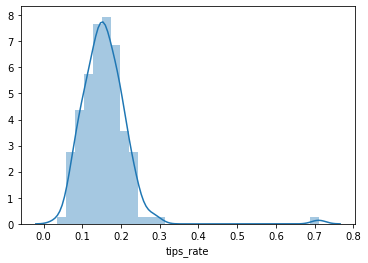

In [21]:
sns.distplot(male_tips)

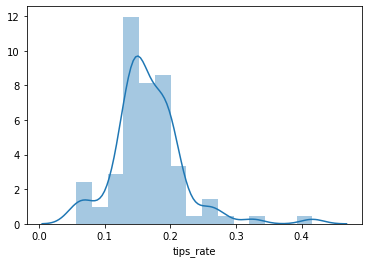

In [22]:
sns.distplot(female_tips)

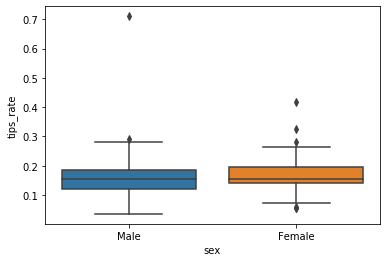

In [23]:
sns.boxplot(data=df, x='sex', y='tips_rate')